In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import time
import scipy.stats as st

In [2]:
# These can be edited to cover any time period
# start = datetime.datetime(2019,1,1)
# end = datetime.datetime(2020,12,31)

In [3]:
# This will download a complete list of companies on the NASDAQ exchange, but we don't need it.  
# Saving for reference tho
# url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
# s = requests.get(url).content
# companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
# companies

In [4]:
symbols = ['FDX', 'UPS', 'TGT','GM','TM','LUV','DAL','TWTR','FB','WMT']
#stockfinal= pd.read_csv("outputData/stocks.csv")
stockfinal=pd.DataFrame()
stock=[]
for ticker in symbols:
    stock=yf.download(ticker, start="2019-01-01", end="2020-12-31")
    if len(stock)!=0:
        stock["Name"]=ticker
        stockfinal=stockfinal.append(stock, sort=False)

stockfinal.to_csv("outputData/stocks.csv", encoding = 'utf-8')
stockfinal

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
...,...,...,...,...,...,...,...
2020-12-23,143.539993,144.220001,142.300003,143.220001,143.220001,6810200,WMT
2020-12-24,143.539993,144.389999,143.179993,143.500000,143.500000,3018200,WMT
2020-12-28,144.039993,145.300003,143.330002,145.220001,145.220001,6448300,WMT


In [5]:
stock_group=stockfinal.groupby("Name")
stock_describe=stock_group["Close"].describe()
stock_describe

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
DAL,504.0,45.129881,13.342683,19.190001,31.199999,50.330000,57.187500,63.160000
FB,504.0,208.017579,39.598348,131.740005,179.985001,196.760002,235.744995,303.910004
FDX,504.0,176.419246,46.649264,90.489998,151.082500,163.309998,184.032497,301.450012
GM,504.0,34.000179,6.110743,16.799999,29.827500,35.840000,38.437500,46.459999
LUV,504.0,46.537341,9.122355,23.870001,38.265000,50.425001,53.852499,58.540001
TGT,504.0,112.107957,29.655817,65.529999,86.197500,110.540001,125.820002,179.820007
TM,504.0,130.135397,8.756029,108.500000,122.907503,129.389999,136.574997,155.089996
TWTR,504.0,36.362024,6.372567,22.000000,31.607501,35.765001,40.360001,55.869999
UPS,504.0,120.197064,24.729566,86.169998,102.074997,114.375000,121.247498,176.539993


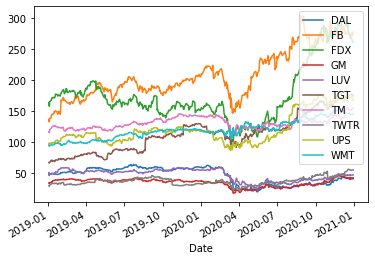

In [6]:
plt.figure()
stock_group["Close"].plot()
plt.legend()
plt.show()

In [7]:
stocksbydate = stockfinal.pivot_table(index=['Date'], columns="Name", values="Close")
stocksbydate

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,50.090000,135.679993,163.190002,33.639999,47.139999,66.440002,116.279999,28.809999,97.209999,93.339996
2019-01-03,45.610001,131.740005,157.190002,32.250000,45.610001,65.529999,114.650002,27.990000,94.449997,92.860001
2019-01-04,47.790001,137.949997,164.429993,33.330002,47.860001,66.430000,119.730003,29.950001,97.739998,93.440002
2019-01-07,47.849998,138.050003,166.729996,34.360001,47.869999,69.680000,121.279999,31.340000,97.410004,94.540001
2019-01-08,47.470001,142.529999,167.020004,34.810001,47.540001,69.610001,122.309998,31.799999,97.419998,95.199997
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,40.240002,268.109985,270.709991,42.450001,46.750000,174.910004,151.160004,54.299999,172.639999,143.220001
2020-12-24,39.730000,267.399994,268.820007,41.580002,46.279999,175.190002,150.470001,53.970001,172.190002,143.500000
2020-12-28,40.150002,277.000000,262.940002,41.660000,46.119999,176.389999,152.600006,54.430000,171.360001,145.220001


In [8]:
#Calculate % change from 2019-01-02 (baseline 100%)
#returns = stocksbydate.apply(lambda x: np.log(x) - np.log(x.shift(1)))
returns = returns = stocksbydate.apply(lambda x: (x / x[0] * 100)-100)
returns

Name,DAL,FB,FDX,GM,LUV,TGT,TM,TWTR,UPS,WMT
Date,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-8.943900,-2.903882,-3.676696,-4.131984,-3.245649,-1.369662,-1.401786,-2.846233,-2.839216,-0.514244
2019-01-04,-4.591733,1.673057,0.759844,-0.921515,1.527368,-0.015054,2.966980,3.956964,0.545210,0.107142
2019-01-07,-4.471954,1.746765,2.169246,2.140313,1.548578,4.876577,4.299966,8.781676,0.205745,1.285627
2019-01-08,-5.230583,5.048649,2.346959,3.478008,0.848540,4.771219,5.185758,10.378340,0.216026,1.992716
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-19.664601,97.604658,65.886382,26.189065,-0.827322,163.260080,29.996565,88.476224,77.594899,53.439047
2020-12-24,-20.682772,97.081374,64.728233,23.602861,-1.824354,163.681511,29.403167,87.330796,77.131986,53.739025
2020-12-28,-19.844277,104.156851,61.125068,23.840668,-2.163769,165.487647,31.234957,88.927460,76.278163,55.581752


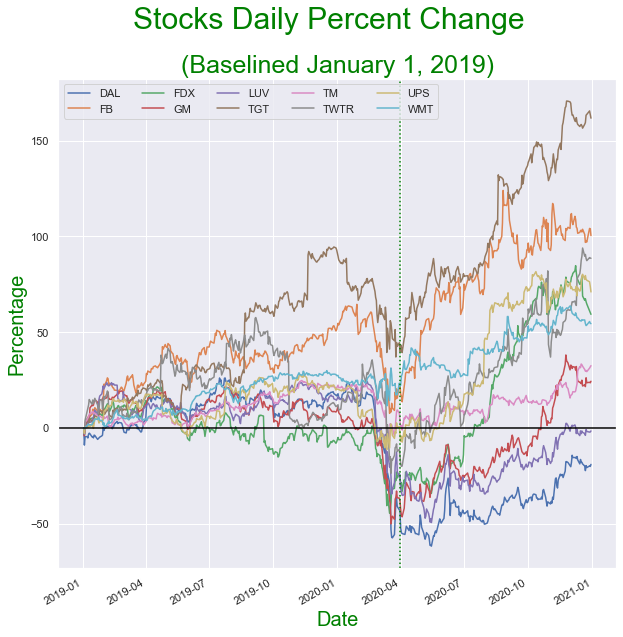

In [17]:
sns.set()
# returns.plot(subplots=True, figsize=(16, 10))
returns.plot(figsize=(10,10)).axhline(y=0, color="black")
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.legend(ncol=5, loc="upper left")
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper right',
           #ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel("Percentage", fontsize=20, color='green')
plt.xlabel("Date", fontsize=20, color='green')
plt.suptitle("Stocks Daily Percent Change", fontsize=30, color='green')
plt.title('(Baselined January 1, 2019)', fontsize=25, color='green')
plt.savefig("All Stocks")
plt.show()

<Figure size 432x288 with 0 Axes>

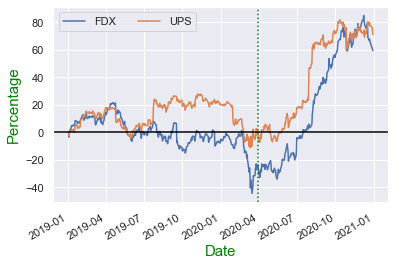

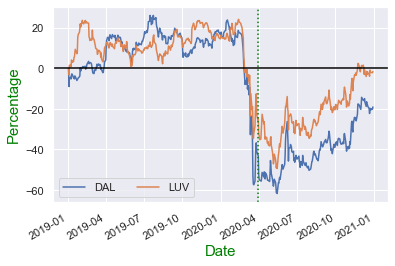

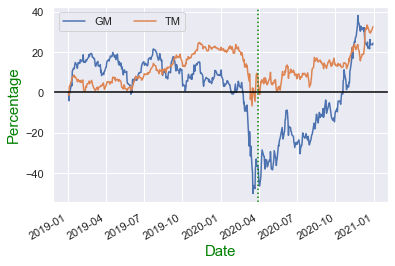

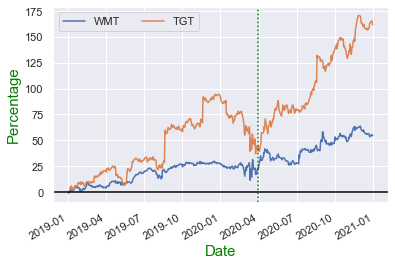

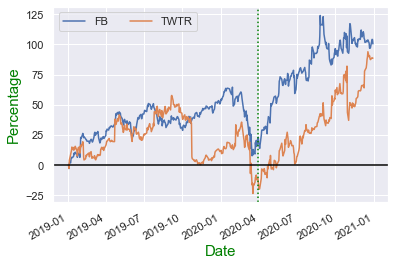

In [16]:
plt.figure()

returns.plot(y=['FDX','UPS']).axhline(y=0, color="black")
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.legend(ncol=2, loc="upper left")
plt.ylabel("Percentage", fontsize=15, color='green')
plt.xlabel("Date", fontsize=15, color='green')
plt.savefig("Fedex vs UPS")

returns.plot(y=['DAL','LUV']).axhline(y=0, color="black")
plt.legend(ncol=2, loc="lower left")
plt.ylabel("Percentage", fontsize=15, color='green')
plt.xlabel("Date", fontsize=15, color='green')
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.savefig("Delta vs Southwest")

returns.plot(y=['GM','TM']).axhline(y=0, color="black")
plt.legend(ncol=2, loc="upper left")
plt.ylabel("Percentage", fontsize=15, color='green')
plt.xlabel("Date", fontsize=15, color='green')
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.savefig("General Motors vs Toyota")

returns.plot(y=['WMT','TGT']).axhline(y=0, color="black")
plt.legend(ncol=2, loc="upper left")
plt.ylabel("Percentage", fontsize=15, color='green')
plt.xlabel("Date", fontsize=15, color='green')
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.savefig("Walmart vs Target")

returns.plot(y=['FB','TWTR']).axhline(y=0, color="black")
plt.legend(ncol=2, loc="upper left")
plt.ylabel("Percentage", fontsize=15, color='green')
plt.xlabel("Date", fontsize=15, color='green')
plt.axvline(x='2020-03-31', color="green", linestyle='dotted')
plt.savefig("Facebook vs Twitter")

plt.show()

In [11]:
#returns2020 = returns.loc['2020']
#returns2020
#plt.figure()
#returns.loc['2019'].plot(y=['FDX','UPS']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2020'].plot(y=['FDX','UPS']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2019'].plot(y=['DAL','LUV']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="lower left")
#returns.loc['2020'].plot(y=['DAL','LUV']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="lower left")
#returns.loc['2019'].plot(y=['GM','TGT']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2020'].plot(y=['GM','TGT']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2019'].plot(y=['WMT','TGT']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2020'].plot(y=['WMT','TGT']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2019'].plot(y=['FB','TWTR']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#returns.loc['2020'].plot(y=['FB','TWTR']).axhline(y=0, color="black")
#plt.legend(ncol=2, loc="upper left")
#plt.show()